<a href="https://colab.research.google.com/github/thesparshpandya/NLP-College-/blob/main/NLP%20Exp1/NLP_Exp_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.util import ngrams

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
#part A
input_sentence = "   \n\t\t   This sentence has messy edges   \t\n.   "

trimmed_sentence = input_sentence.strip()

print(f"Original: '{input_sentence}'")
print(f"Trimmed:  '{trimmed_sentence}'")

Original: '   
		   This sentence has messy edges   	
.   '
Trimmed:  'This sentence has messy edges   	
.'


In [ ]:
#lower case
lower_sentence = trimmed_sentence.lower()
print(f"Lower Case: {lower_sentence}")

Lower Case: this sentence has messy edges   	
.


In [ ]:
# Upper Case
upper_sentence = trimmed_sentence.upper()
print(f"Upper Case: {upper_sentence}")

Upper Case: THIS SENTENCE HAS MESSY EDGES   	
.


In [ ]:
tokens = word_tokenize(lower_sentence)

vocabulary = set(tokens)

print(f"Tokens: {tokens}")
print(f"Vocabulary Size: {len(vocabulary)}")
print(f"Vocabulary: {vocabulary}")

Tokens: ['this', 'sentence', 'has', 'messy', 'edges', '.']
Vocabulary Size: 6
Vocabulary: {'this', 'has', 'messy', 'sentence', '.', 'edges'}


In [ ]:
stop_words = set(stopwords.words('english'))

filtered_tokens = []

for word in tokens:
    if word not in stop_words and word not in string.punctuation:
        filtered_tokens.append(word)

print(f"Tokens before cleaning: {tokens}")
print(f"Tokens after removing stop words & punctuation: {filtered_tokens}")

Tokens before cleaning: ['this', 'sentence', 'has', 'messy', 'edges', '.']
Tokens after removing stop words & punctuation: ['sentence', 'messy', 'edges']


In [ ]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

stemmed_words = [stemmer.stem(word) for word in filtered_tokens]
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_tokens]

print(f"Stemmed: {stemmed_words}")
print(f"Lemmatized: {lemmatized_words}")

Stemmed: ['sentenc', 'messi', 'edg']
Lemmatized: ['sentence', 'messy', 'edge']


In [ ]:
n = 2
bigrams = list(ngrams(filtered_tokens, n))

print(f"Bigrams: {bigrams}")

Bigrams: [('sentence', 'messy'), ('messy', 'edges')]


In [ ]:
#part B

text_content = """
Seven half-bloods shall answer the call. To storm or fire the world must fall.
Jason Grace stood on the deck of the Argo II, looking out at the clouds.
The flying ship was a marvel of machinery and magic, built by Leo Valdez.
"We are getting close to the ancient lands," Annabeth Chase said, checking her map.
Percy Jackson held Riptide tightly. The monsters were waiting, but the demigods were ready to fight.
It was going to be a long, dangerous journey to Greece.
"""

with open('sample1.txt', 'w') as file:
    file.write(text_content.strip())

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import string

nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [ ]:
with open('sample1.txt', 'r') as file:
    data = file.read()

tokens = word_tokenize(data)

unique_tokens = set(tokens)
print(f"Total Tokens: {len(tokens)}")
print(f"Unique Tokens (Vocabulary Size): {len(unique_tokens)}")

punctuation_count = sum(1 for char in data if char in string.punctuation)
print(f"Total Punctuation Characters: {punctuation_count}")

Total Tokens: 100
Unique Tokens (Vocabulary Size): 74
Total Punctuation Characters: 17


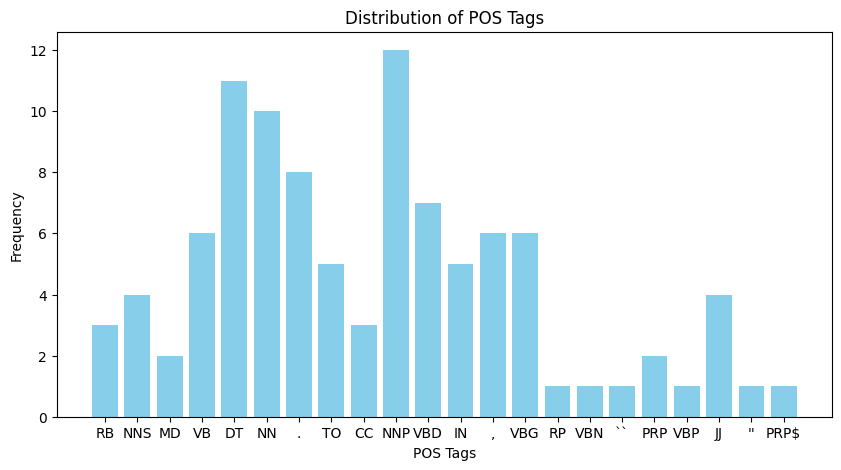

In [ ]:
pos_tags = nltk.pos_tag(tokens)

tags_only = [tag for word, tag in pos_tags]

tag_counts = Counter(tags_only)

plt.figure(figsize=(10, 5))
plt.bar(tag_counts.keys(), tag_counts.values(), color='skyblue')
plt.title("Distribution of POS Tags")
plt.xlabel("POS Tags")
plt.ylabel("Frequency")
plt.show()


Number of Unique Lemmas: 72


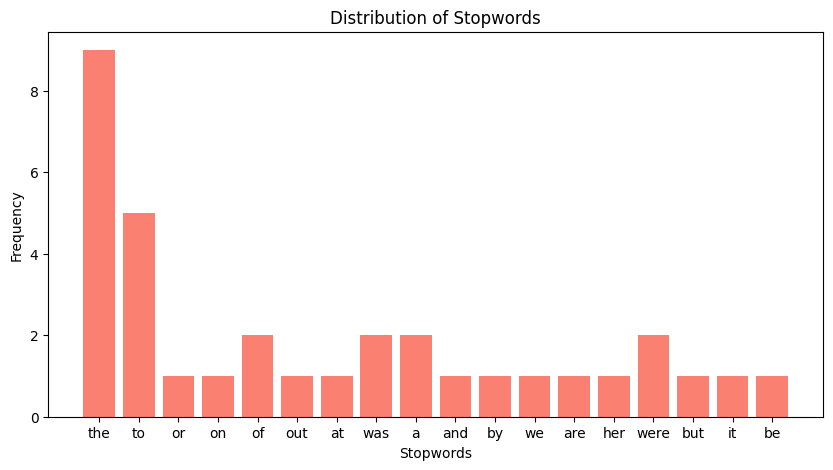

In [ ]:
lemmatizer = WordNetLemmatizer()

lemmas = [lemmatizer.lemmatize(word.lower()) for word in tokens]
unique_lemmas = set(lemmas)

print(f"\nNumber of Unique Lemmas: {len(unique_lemmas)}")


stop_words = set(stopwords.words('english'))

found_stopwords = [word.lower() for word in tokens if word.lower() in stop_words]

stopword_counts = Counter(found_stopwords)

if stopword_counts:
    plt.figure(figsize=(10, 5))
    plt.bar(stopword_counts.keys(), stopword_counts.values(), color='salmon')
    plt.title("Distribution of Stopwords")
    plt.xlabel("Stopwords")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("No stopwords found.")